In [1]:
from collections import defaultdict, Counter
from matplotlib import pyplot as plt
import pandas as pd
import numpy as np
import seaborn as sns

pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = 'all'

In [2]:
data = \
[[['авдотья ивановна'],
  ['авдотья ивановна', 'карягина'],
  ['авдотья ивановна', 'карягина', 'феня'],
  ['авдотья ивановна', 'карягина'],
  ['авдотья ивановна', 'архип'],
  ['архип', 'феня'],
  ['авдотья ивановна', 'феня'],
  ['авдотья ивановна', 'феня', 'терихов'],
  ['авдотья ивановна', 'карягина', 'иван'],
  ['авдотья ивановна', 'карягин', 'карягина'],
  ['авдотья ивановна', 'карягин', 'карягина', 'иван']],
 [['любавин'],
  ['любавин', 'терихов', 'феня'],
  ['любавин', 'терихов', 'феня', 'архип'],
  ['архип', 'терихов', 'феня'],
  ['терихов', 'сладнев'],
  ['терихов', 'сладнев', 'феня'],
  ['терихов', 'сладнев', 'феня', 'карягин'],
  ['феня', 'карягин'],
  ['карягин', 'сладнев'],
  ['сладнев', 'терихов'],
  ['сладнев', 'терихов', 'анна захаровна'],
  ['сладнев', 'терихов', 'анна захаровна', 'феня'],
  ['терихов', 'феня'],
  ['терихов', 'архип', 'волжин']],
 [['карягина', 'пров'],
  ['карягин', 'карягина'],
  ['карягин', 'карягина', 'феня', 'любавин'],
  ['феня', 'карягин', 'волжин'],
  ['феня', 'карягина'],
  ['феня', 'карягина', 'карягин'],
  ['карягин', 'волжин', 'пров', 'иван', 'карягина'],
  ['карягин', 'волжин', 'карягина', 'феня', 'авдотья ивановна']],
 [['волжин', 'архип'],
  ['волжин', 'анна захаровна'],
  ['волжин', 'анна захаровна', 'терихов'],
  ['волжин', 'терихов'],
  ['феня', 'сладнев'],
  ['феня', 'волжин'],
  ['волжин', 'архип', 'терихов', 'феня'],
  ['терихов', 'сладнев'],
  ['терихов', 'сладнев', 'феня'],
  ['феня', 'терихов'],
  ['терихов', 'архип'],
  ['архип', 'карягин', 'феня']],
 [['пров', 'иван'],
  ['пров', 'иван', 'карягин'],
  ['карягин'],
  ['карягин', 'феня'],
  ['карягин', 'карягина', 'феня']]]


## Матрица

In [3]:
drama_heroes = [hero for act in data for scene in act for hero in scene]
drama_heroes = list(sorted(set(drama_heroes)))
matrices = [np.array([[1 if hero in scene else 0 for scene in act] for hero in drama_heroes]) for act in data]

In [4]:
def rome(dec):
    return {1: 'I', 2: 'II', 3: 'III', 4: 'IV', 5: 'V', 6: 'VI'}[dec]

def col(act, scene):
    return rome(act) + '.' + str(scene)

def cols():
    return [col(n_act+1, n_scene+1) for n_act, act in enumerate(matrices) for n_scene in range(len(act[0]))]

matrix = np.hstack(matrices)
pd.DataFrame(matrix, index=drama_heroes, columns=cols())

,I.1,I.2,I.3,I.4,I.5,I.6,I.7,I.8,I.9,I.10,I.11,II.1,II.2,II.3,II.4,II.5,II.6,II.7,II.8,II.9,II.10,II.11,II.12,II.13,II.14,III.1,III.2,III.3,III.4,III.5,III.6,III.7,III.8,IV.1,IV.2,IV.3,IV.4,IV.5,IV.6,IV.7,IV.8,IV.9,IV.10,IV.11,IV.12,V.1,V.2,V.3,V.4,V.5
авдотья ивановна,1,1,1,1,1,0,1,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
анна захаровна,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0
архип,0,0,0,0,1,1,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,1,1,0,0,0,0,0
волжин,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,1,1,1,1,1,0,1,1,0,0,0,0,0,0,0,0,0,0
иван,0,0,0,0,0,0,0,0,1,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
карягин,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,1,1,1,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,1,0,1,1,1,1
карягина,0,1,1,1,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1
любавин,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
пров,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0
сладнев,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,1,1,0,1,1,1,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,1,1,0,0,0,0,0,0,0,0


## Мобильность

In [5]:
def mob(mat):
    return (np.sum(np.abs(mat[:, 1:] - mat[:, :-1]), axis=1) - 1) / (len(mat[0])-1)

index = list(range(1, len(matrices) + 1)) + ['пьеса']
mobility = list(map(mob, matrices + [matrix]))
mobility = pd.DataFrame(mobility, index=index, columns=drama_heroes).round(2).transpose()
mobility[mobility < 0] = ''
mobility

,1,2,3,4,5,пьеса
авдотья ивановна,0.1,,0,,,0.08
анна захаровна,,0.08,,0.09,,0.06
архип,0.1,0.15,,0.27,,0.22
волжин,,0,0.29,0.18,,0.14
иван,0.2,,0.14,,0,0.14
карягин,0,0.08,0.29,0,0,0.20
карягина,0.2,,0.14,,0,0.16
любавин,,0,0.14,,,0.06
пров,,,0.29,,0,0.10
сладнев,,0.23,,0.27,,0.14


## Плотность

In [6]:
def dens(matrix):
#     print(np.count_nonzero(matrix), '/', matrix.size, sep='', end=', ')
    return np.count_nonzero(matrix)/matrix.size

In [7]:
print('Плотность всей пьесы:', round(dens(matrix), 2))

act_d = list(map(dens, matrices))
act_d_ = np.array(act_d).reshape(-1, 1)
scene_d = [[dens(c) for c in m.T] for m in matrices]
scene_d_ = pd.DataFrame(scene_d).values # to fill with nans
columns = list(range(1, len(scene_d_[0]) + 1)) + ['действия']
index = list(range(1, len(data)+1))
density = pd.DataFrame(np.hstack((scene_d_, act_d_)), columns=columns, index=index)
density.round(2).fillna('')

Плотность всей пьесы: 0.22


,1,2,3,4,5,6,7,8,9,10,11,12,13,14,действия
1,0.08,0.17,0.25,0.17,0.17,0.17,0.17,0.25,0.25,0.25,0.33,,,,0.20
2,0.08,0.25,0.33,0.25,0.17,0.25,0.33,0.17,0.17,0.17,0.25,0.33,0.17,0.25,0.23
3,0.17,0.17,0.33,0.25,0.17,0.25,0.42,0.42,,,,,,,0.27
4,0.17,0.17,0.25,0.17,0.17,0.17,0.33,0.17,0.25,0.17,0.17,0.25,,,0.20
5,0.17,0.25,0.08,0.17,0.25,,,,,,,,,,0.18


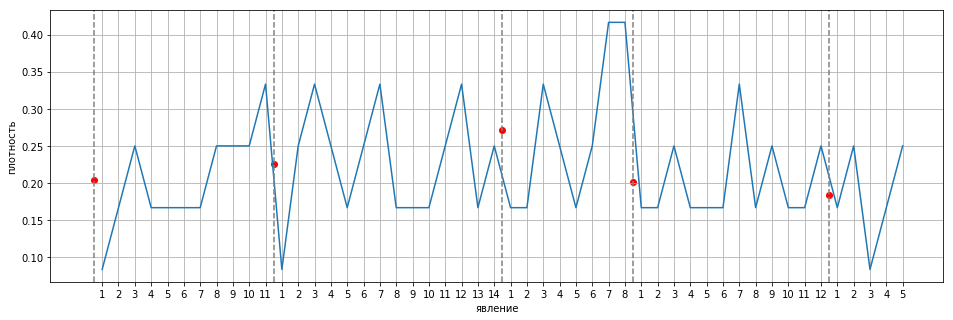

In [8]:
from itertools import accumulate

plt.subplots(figsize=(16, 5));

flat = [tup for act in scene_d for tup in enumerate(act, start=1)]
ticks, values = zip(*flat)
plt.plot(values);
plt.xticks(range(len(ticks)), ticks);

borders = np.array(list(accumulate(map(len, [[]] + scene_d))))
plt.scatter(borders[:-1]-0.5, act_d, c='red');
for x in borders[:-1]:
    plt.axvline(x-0.5, c='gray', ls='--');
    
plt.xlabel('явление');
plt.ylabel('плотность');
plt.grid();

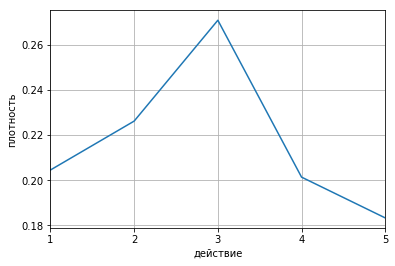

In [9]:
plt.plot(act_d)
plt.grid();
plt.xlabel('действие');
plt.ylabel('плотность');
plt.xticks(range(len(act_d)+1), range(1, len(act_d)+1));
plt.xlim([0, len(act_d)-1]);

## Расстояние

In [10]:
def dist(mat):
    n = len(drama_heroes)
    dist = np.zeros((n, n))*np.nan
    for i in range(n-1):
        for j in range(i+1, n):
            if np.sum(mat[i]) != 0 and np.sum(mat[j]) != 0:
                dist[i][j] = dist[j][i] = np.sum(np.abs(mat[i] - mat[j]))
    return dist/len(mat[0])

In [11]:
act_d = [dist(m) for m in matrices]
drama_d = dist(matrix)

In [12]:
distances = [pd.DataFrame(d, index=drama_heroes, columns=drama_heroes).stack() for d in act_d + [drama_d]]
distances = pd.concat(distances, axis=1)
distances.columns = list(range(1, len(act_d) + 1)) + ['пьеса']
distances.round(2).fillna('')

1     2     3     4    5  пьеса
авдотья ивановна анна захаровна                                  0.30
                 архип             0.91                          0.36
                 волжин                        0.25              0.38
                 иван              0.73        0.25              0.24
                 карягин           0.73        0.62              0.42
                 карягина          0.36        0.75              0.22
                 любавин                       0.25              0.30
                 пров                          0.38              0.30
                 сладнев                                         0.42
                 терихов           0.82                          0.56
                 феня              0.73         0.5              0.56
анна захаровна   авдотья ивановна                                0.30
                 архип                   0.36         0.5        0.26
                 волжин                  0.21        0.33        0.20
                 иван                                            0.18
                 карягин                 0.36        0.25        0.40
                 карягина                                        0.36
                 любавин                 0.36                    0.16
                 пров                                            0.16
                 сладнев                 0.36        0.42        0.20
                 терихов                 0.64        0.58        0.34
                 феня                    0.57        0.67        0.54
архип            авдотья ивановна  0.91                          0.36
                 анна захаровна          0.36         0.5        0.26
                 волжин                  0.14         0.5        0.26
                 иван              0.36                          0.28
                 карягин           0.36  0.43        0.25        0.46
                 карягина          0.73                          0.46
                 любавин                 0.29                    0.22
                 пров                                            0.26
                 сладнев                 0.71        0.58        0.38
                 терихов           0.27  0.57        0.58        0.36
                 феня              0.36   0.5         0.5        0.48
волжин           авдотья ивановна              0.25              0.38
                 анна захаровна          0.21        0.33        0.20
                 архип                   0.14         0.5        0.26
                 иван                          0.25              0.26
                 карягин                 0.29  0.38  0.58        0.40
                 карягина                      0.75              0.40
                 любавин                 0.29   0.5              0.28
                 пров                          0.38              0.24
                 сладнев                 0.57        0.75        0.40
                 терихов                 0.71        0.58        0.42
                 феня                    0.64   0.5  0.67        0.54
иван             авдотья ивановна  0.73        0.25              0.24
                 анна захаровна                                  0.18
                 архип             0.36                          0.28
                 волжин                        0.25              0.26
                 карягин           0.18        0.62        0.8   0.30
                 карягина          0.36        0.75        0.6   0.26
                 любавин                       0.25              0.18
                 пров                          0.12          0   0.06
                 сладнев                                         0.30
                 терихов           0.27                          0.48
                 феня              0.55        0.75        0.8   0.60
карягин          авдотья ивановна  0.73        0.62              0.42
                 анна захаровна          0.36   

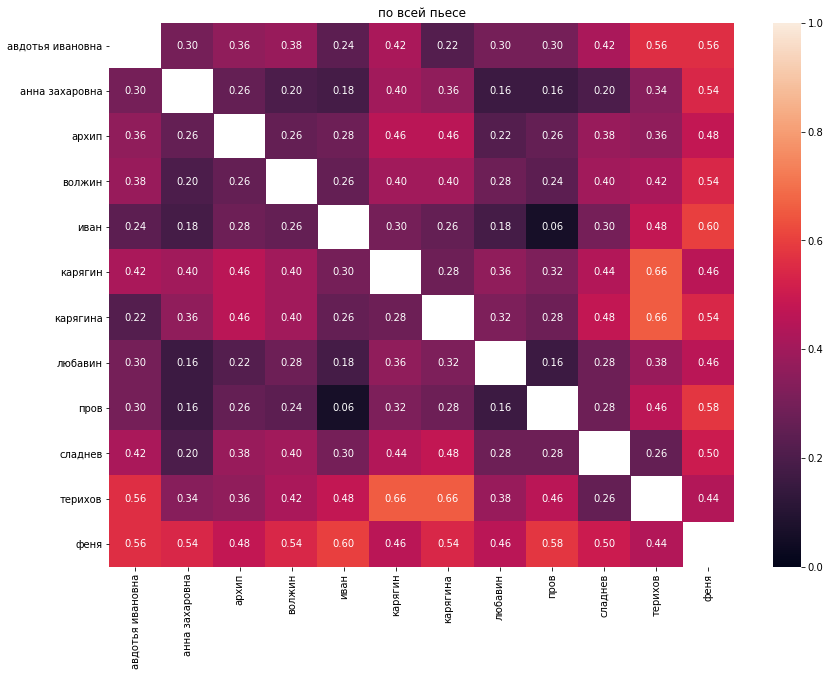

In [13]:
plt.subplots(figsize=(14, 10))
sns.heatmap(drama_d, vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title('по всей пьесе');

## Абстрактные типы отношений (= соп., <> альт., > или < дом.)

In [14]:
for i, j in zip(*np.where(drama_d == 0)):
    if i != j and i < j:
        p = np.sum(matrix[i])
        q = np.sum(matrix[j])
        s = '=' if p == q else ('>' if p > q else '<')
        print(drama_heroes[i], s, drama_heroes[j])

## Ранг

In [15]:
rank = [np.sum(np.sum(matrix, axis=0)[np.where(matrix[i] != 0)[0]] - 1) for i in range(len(drama_heroes))]
df = pd.DataFrame(dict(zip(drama_heroes, rank)), index=['ранг']).sort_values(by='ранг', axis=1, ascending=False)

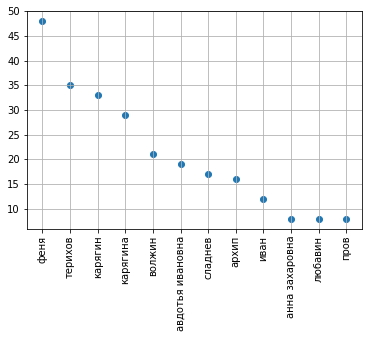

In [16]:
plt.scatter(range(len(drama_heroes)), df.values);
plt.xticks(range(len(drama_heroes)), df.columns, rotation=90);
plt.grid();

In [17]:
df

,феня,терихов,карягин,карягина,волжин,авдотья ивановна,сладнев,архип,иван,анна захаровна,любавин,пров
ранг,48,35,33,29,21,19,17,16,12,8,8,8


## Абсолютные относительные частоты

In [18]:
def freq(mat):
    return np.sum(mat, axis=1)/len(mat[0])

index = list(range(1, len(matrices) + 1)) + ['пьеса']
freq_abs = list(map(freq, matrices + [matrix]))
freq_abs = pd.DataFrame(freq_abs, index=index, columns=drama_heroes).round(2).transpose()
freq_abs[freq_abs == 0] = ''
freq_abs.sort_values(by='пьеса', ascending=False)

,1,2,3,4,5,пьеса
феня,0.36,0.57,0.62,0.5,0.4,0.50
терихов,0.09,0.79,,0.58,,0.38
карягин,0.18,0.21,0.75,0.08,0.8,0.32
карягина,0.55,,0.88,,0.2,0.28
авдотья ивановна,0.91,,0.12,,,0.22
волжин,,0.07,0.38,0.5,,0.20
сладнев,,0.5,,0.25,,0.20
архип,0.18,0.21,,0.33,,0.18
иван,0.18,,0.12,,0.4,0.10
анна захаровна,,0.14,,0.17,,0.08


## Условные относительные частоты

In [19]:
def rel_freq(mat):
    busyness = np.sum(mat, axis=1)
    freq_rel = np.zeros((len(drama_heroes), len(drama_heroes)))
    for i in range(len(mat)):
        for j in range(len(mat)):
            if busyness[j] == 0 or i == j:
                freq_rel[i, j] = np.nan
            else:
                freq_rel[i, j] = np.count_nonzero(mat[i] + mat[j] - 2 == 0)/busyness[j]
    return freq_rel

for i, m in enumerate(matrices):
    print('Действие', i+1)
    pd.DataFrame(rel_freq(m), index=drama_heroes, columns=drama_heroes).round(2).fillna('')
    
print('По всей пьесе')
pd.DataFrame(rel_freq(matrix), index=drama_heroes, columns=drama_heroes).round(2).fillna('')

Действие 1


,авдотья ивановна,анна захаровна,архип,волжин,иван,карягин,карягина,любавин,пров,сладнев,терихов,феня
авдотья ивановна,,,0.5,,1,1,1,,,,1,0.75
анна захаровна,0,,0,,0,0,0,,,,0,0
архип,0.1,,,,0,0,0,,,,0,0.25
волжин,0,,0,,0,0,0,,,,0,0
иван,0.2,,0,,,0.5,0.33,,,,0,0
карягин,0.2,,0,,0.5,,0.33,,,,0,0
карягина,0.6,,0,,1,1,,,,,0,0.25
любавин,0,,0,,0,0,0,,,,0,0
пров,0,,0,,0,0,0,,,,0,0
сладнев,0,,0,,0,0,0,,,,0,0


Действие 2


,авдотья ивановна,анна захаровна,архип,волжин,иван,карягин,карягина,любавин,пров,сладнев,терихов,феня
авдотья ивановна,,0,0,0,,0,,0,,0,0,0
анна захаровна,,,0,0,,0,,0,,0.29,0.18,0.12
архип,,0,,1,,0,,0.33,,0,0.27,0.25
волжин,,0,0.33,,,0,,0,,0,0.09,0
иван,,0,0,0,,0,,0,,0,0,0
карягин,,0,0,0,,,,0,,0.29,0.09,0.25
карягина,,0,0,0,,0,,0,,0,0,0
любавин,,0,0.33,0,,0,,,,0,0.18,0.25
пров,,0,0,0,,0,,0,,0,0,0
сладнев,,1,0,0,,0.67,,0,,,0.55,0.38


Действие 3


,авдотья ивановна,анна захаровна,архип,волжин,иван,карягин,карягина,любавин,пров,сладнев,терихов,феня
авдотья ивановна,,,,0.33,0,0.17,0.14,0,0,,,0.2
анна захаровна,0,,,0,0,0,0,0,0,,,0
архип,0,,,0,0,0,0,0,0,,,0
волжин,1,,,,1,0.5,0.29,0,0.5,,,0.4
иван,0,,,0.33,,0.17,0.14,0,0.5,,,0
карягин,1,,,1,1,,0.71,1,0.5,,,0.8
карягина,1,,,0.67,1,0.83,,1,1,,,0.8
любавин,0,,,0,0,0.17,0.14,,0,,,0.2
пров,0,,,0.33,1,0.17,0.29,0,,,,0
сладнев,0,,,0,0,0,0,0,0,,,0


Действие 4


,авдотья ивановна,анна захаровна,архип,волжин,иван,карягин,карягина,любавин,пров,сладнев,терихов,феня
авдотья ивановна,,0,0,0,,0,,,,0,0,0
анна захаровна,,,0,0.33,,0,,,,0,0.14,0
архип,,0,,0.33,,1,,,,0,0.29,0.33
волжин,,1,0.5,,,0,,,,0,0.43,0.33
иван,,0,0,0,,0,,,,0,0,0
карягин,,0,0.25,0,,,,,,0,0,0.17
карягина,,0,0,0,,0,,,,0,0,0
любавин,,0,0,0,,0,,,,0,0,0
пров,,0,0,0,,0,,,,0,0,0
сладнев,,0,0,0,,0,,,,,0.29,0.33


Действие 5


,авдотья ивановна,анна захаровна,архип,волжин,иван,карягин,карягина,любавин,пров,сладнев,терихов,феня
авдотья ивановна,,,,,0,0,0,,0,,,0
анна захаровна,,,,,0,0,0,,0,,,0
архип,,,,,0,0,0,,0,,,0
волжин,,,,,0,0,0,,0,,,0
иван,,,,,,0.25,0,,1,,,0
карягин,,,,,0.5,,1,,0.5,,,1
карягина,,,,,0,0.25,,,0,,,0.5
любавин,,,,,0,0,0,,0,,,0
пров,,,,,1,0.25,0,,,,,0
сладнев,,,,,0,0,0,,0,,,0


По всей пьесе


,авдотья ивановна,анна захаровна,архип,волжин,иван,карягин,карягина,любавин,пров,сладнев,терихов,феня
авдотья ивановна,,0,0.11,0.1,0.4,0.19,0.5,0,0,0,0.05,0.16
анна захаровна,0,,0,0.2,0,0,0,0,0,0.2,0.16,0.04
архип,0.09,0,,0.3,0,0.06,0,0.25,0,0,0.26,0.2
волжин,0.09,0.5,0.33,,0.2,0.19,0.14,0,0.25,0,0.21,0.16
иван,0.18,0,0,0.1,,0.19,0.21,0,0.75,0,0,0
карягин,0.27,0,0.11,0.3,0.6,,0.57,0.25,0.5,0.2,0.05,0.36
карягина,0.64,0,0,0.2,0.6,0.5,,0.25,0.5,0,0,0.24
любавин,0,0,0.11,0,0,0.06,0.07,,0,0,0.11,0.12
пров,0,0,0,0.1,0.6,0.12,0.14,0,,0,0,0
сладнев,0,0.5,0,0,0,0.12,0,0,0,,0.42,0.2


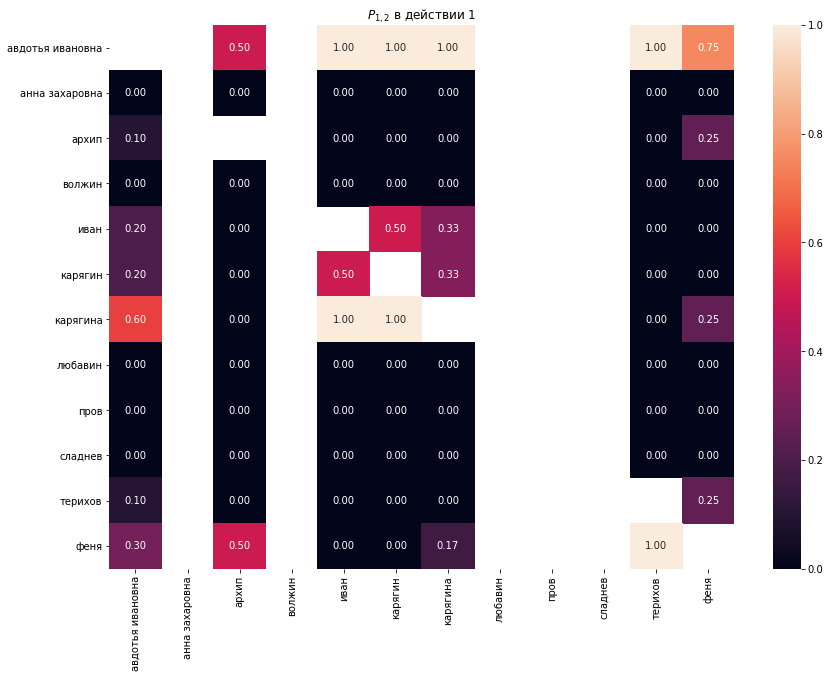

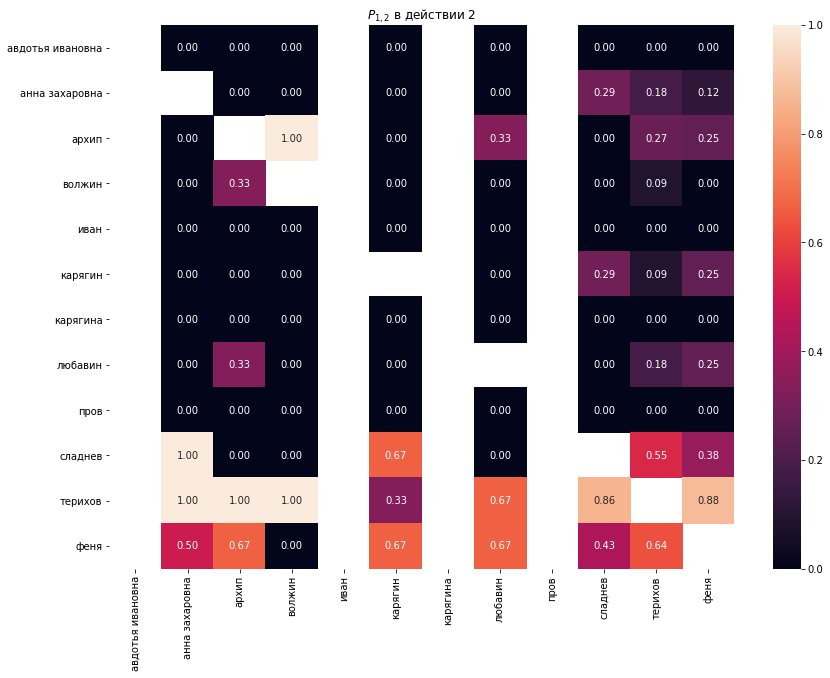

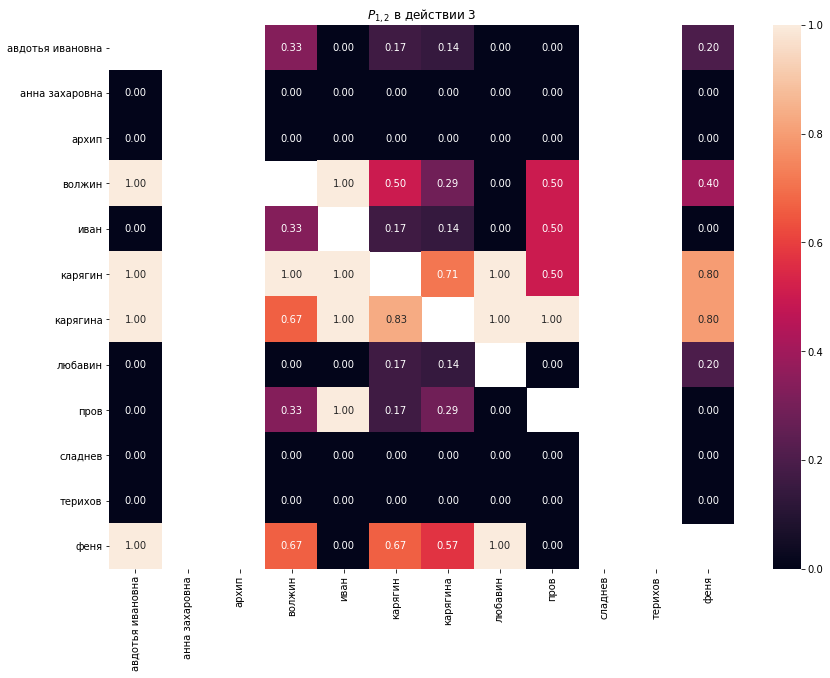

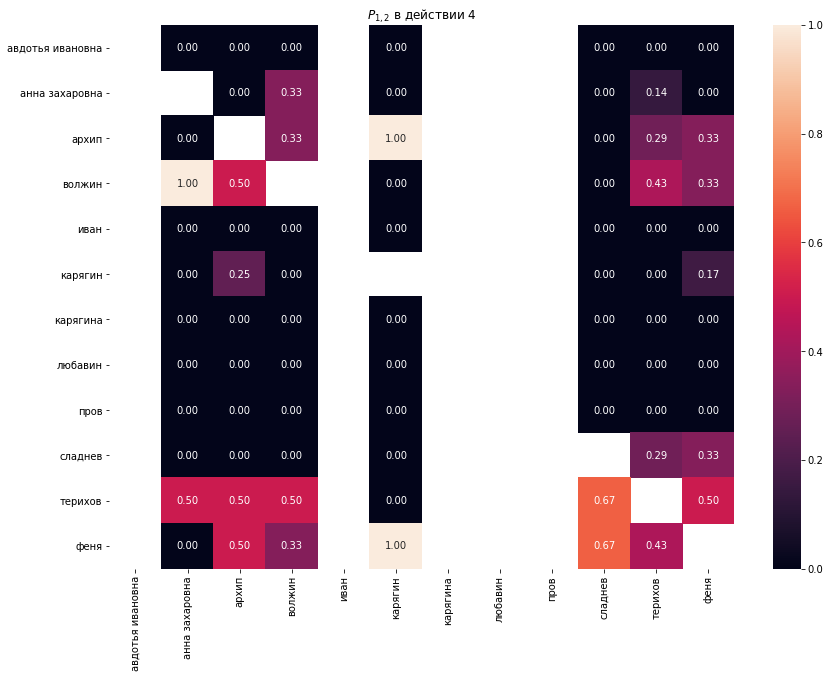

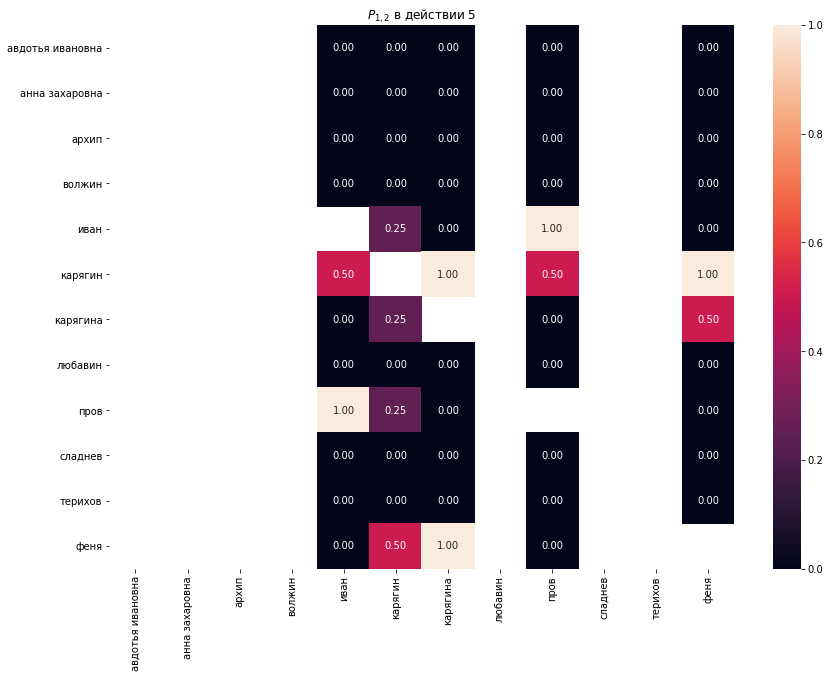

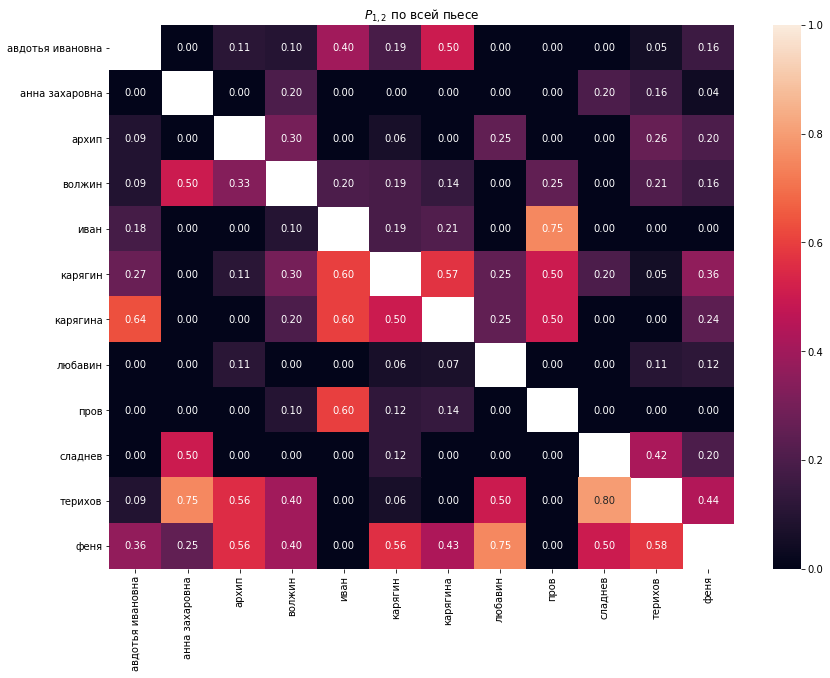

In [20]:
for i, m in enumerate(matrices):
    plt.subplots(figsize=(14, 10))
    sns.heatmap(rel_freq(m), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
    plt.title(r"$P_{1,2}$ в действии " + str(i+1));

plt.subplots(figsize=(14, 10))
sns.heatmap(rel_freq(matrix), vmin=0, vmax=1, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f')
plt.title(r"$P_{1,2}$ по всей пьесе");

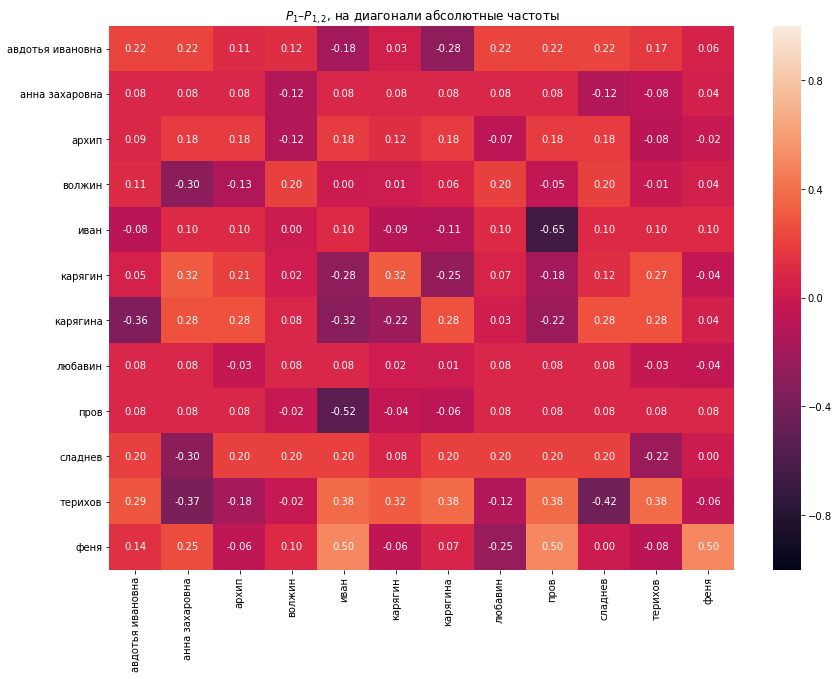

In [21]:
freq_abs = freq(matrix).reshape((-1, 1))
freq_rel = rel_freq(matrix)
freq_ = freq_abs - freq_rel
freq_[np.diag_indices(len(freq_[0]))] = freq_abs.ravel()
plt.subplots(figsize=(14, 10))
sns.heatmap(freq_, annot=True, xticklabels=drama_heroes, yticklabels=drama_heroes, fmt='.2f', vmin=-1, vmax=1)
plt.title(r"$P_1 – P_{1,2}$, на диагонали абсолютные частоты");